In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('output/artist_data.csv')
df.head()

,Unnamed: 0,Artist,Year Inducted,Years Waited,# of Years Nominated,Influenced,Certified Units (Millions),Albums in RS500,Top 100 Singles,Highest Position,Times on Cover of RS,Score,Spotify,In_Out
0,0,The Beatles,1988.0,0,1,1230.0,178.0,10.0,80,1,16.0,4.81,15022354,1
1,1,Elvis Presley,1986.0,0,1,273.0,146.5,3.0,158,1,7.0,3.31,7518562,1
2,2,The Eagles,1998.0,0,1,17.0,120.0,2.0,21,1,3.0,3.50,8989332,1
3,3,Led Zeppelin,1995.0,0,1,355.0,111.5,5.0,10,4,12.0,4.50,10306295,1
4,4,Michael Jackson,2001.0,3,1,176.0,84.0,3.0,49,1,6.0,3.65,24068900,1


C:\Users\astor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:494: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X,a,b,gridsize)/(delta*nobs)
C:\Users\astor\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\astor\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


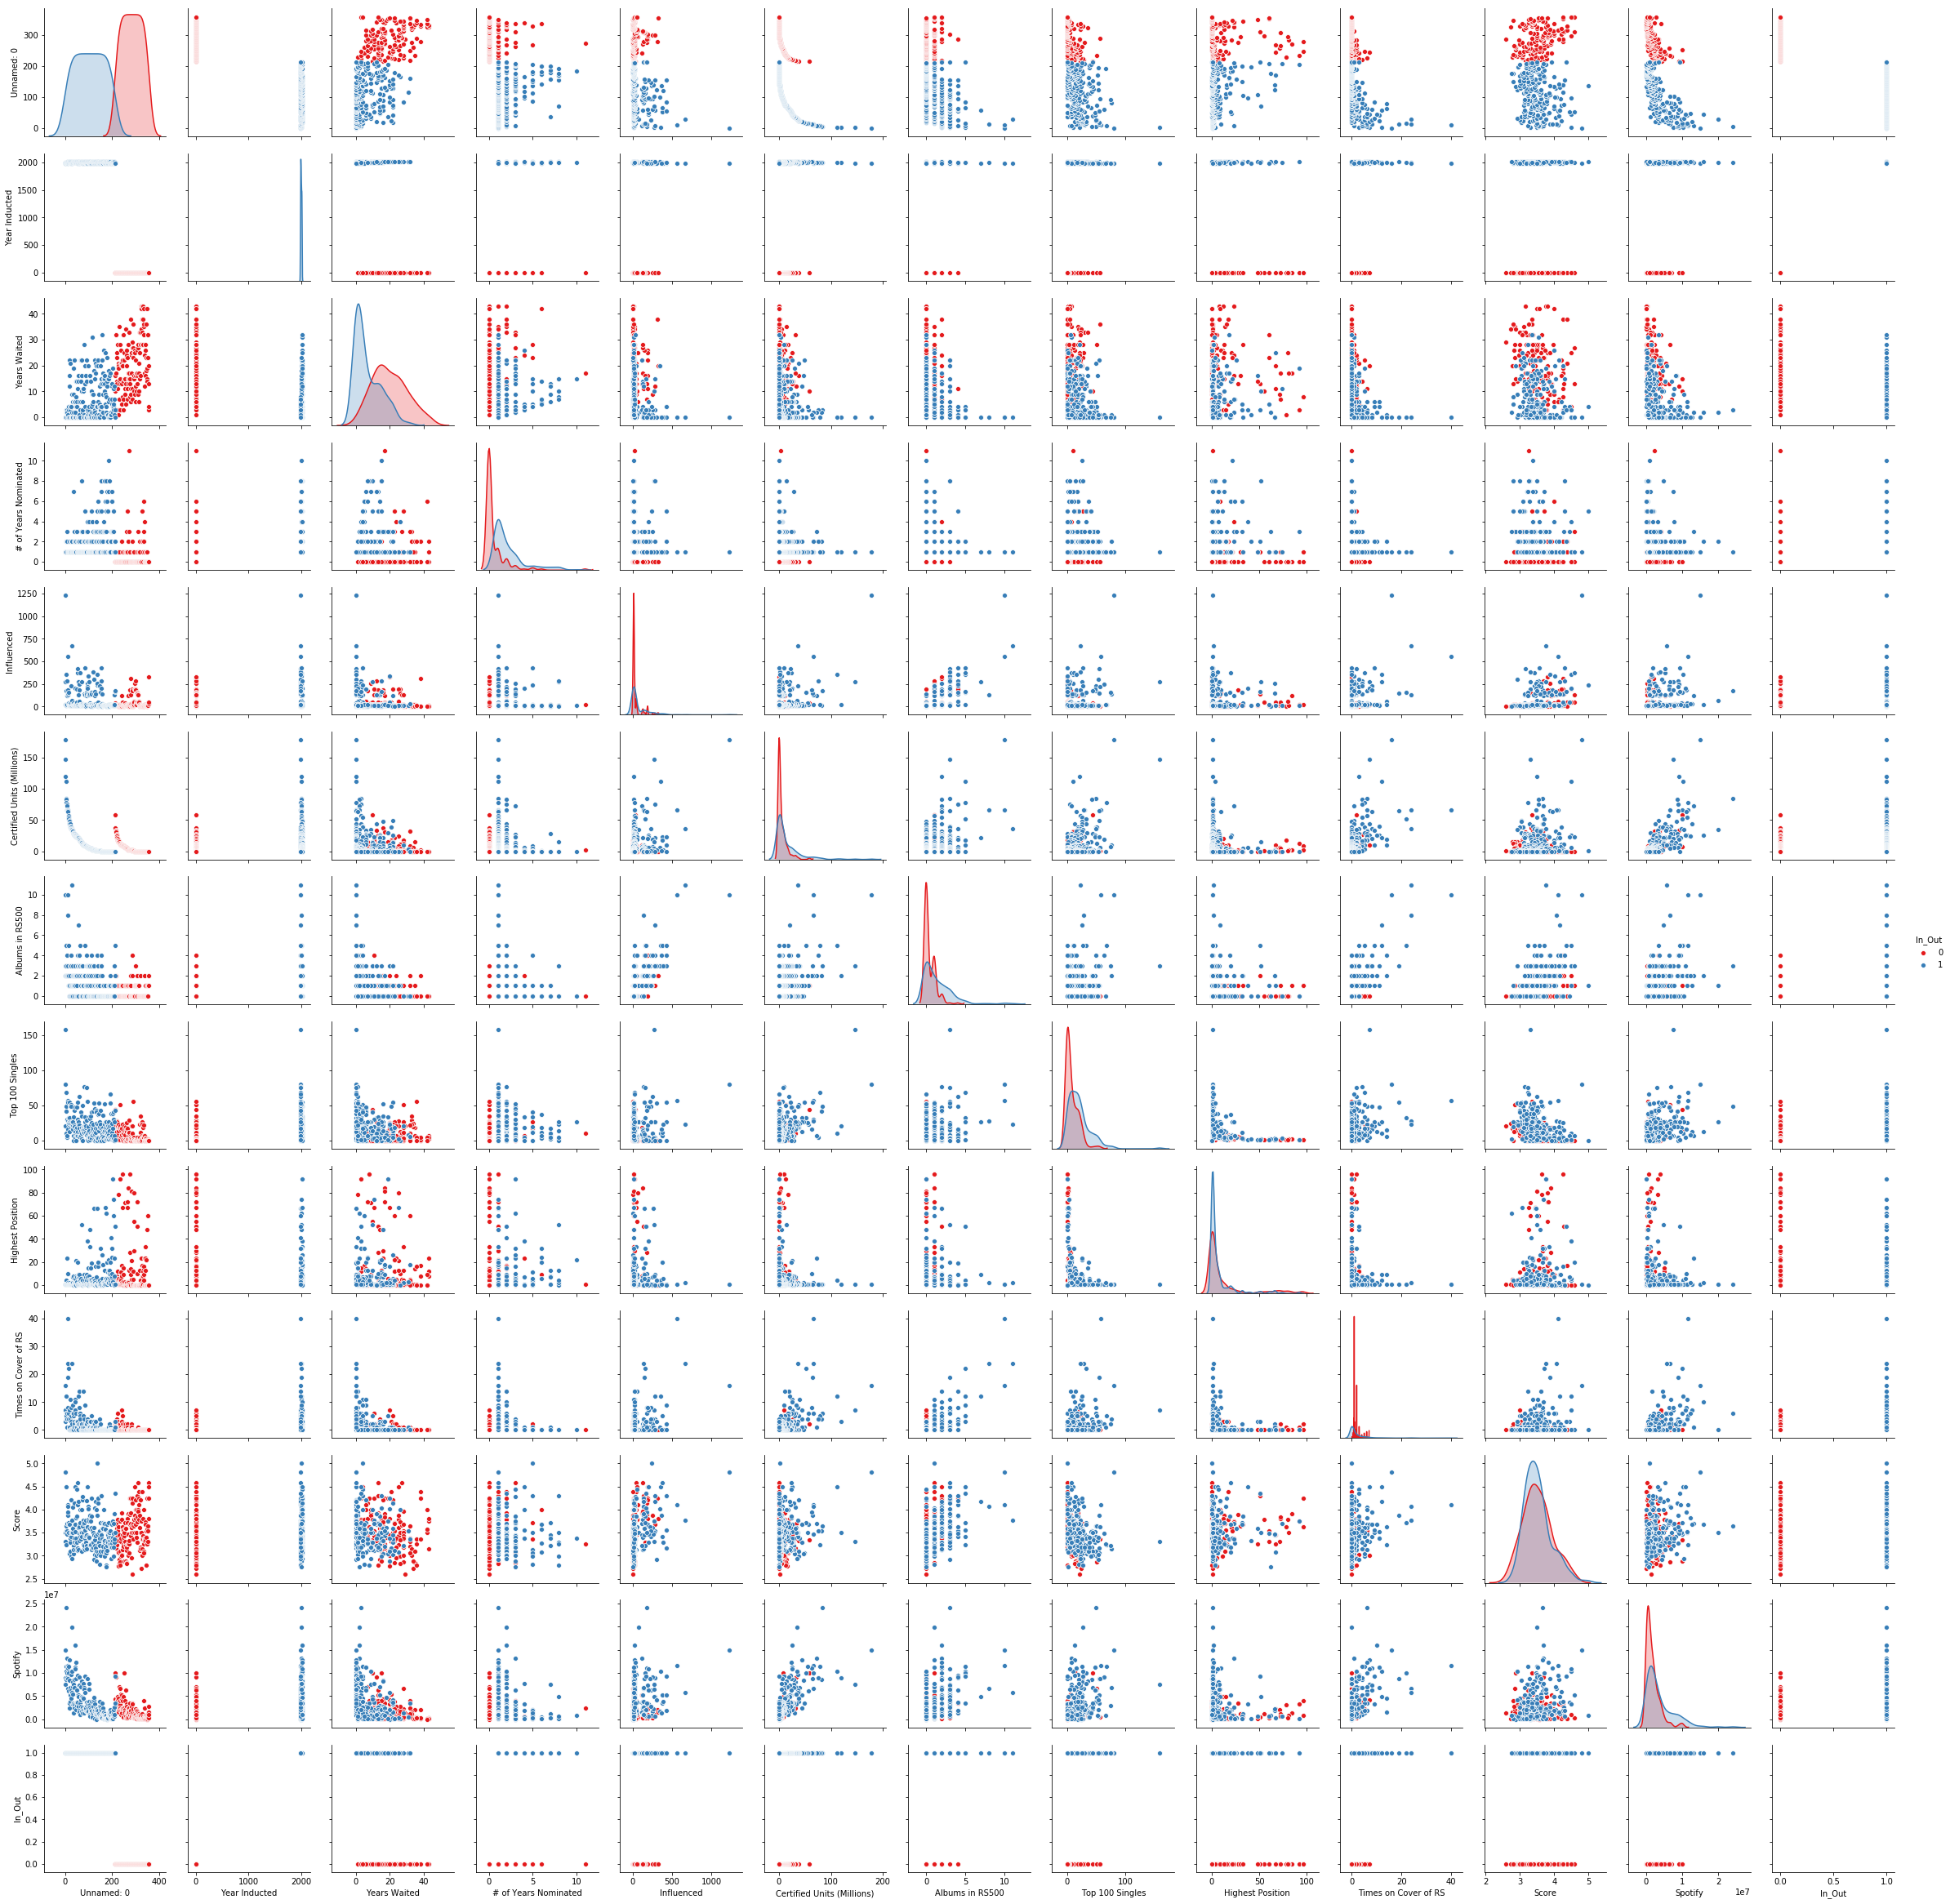

In [3]:
sns.pairplot(df,hue='In_Out',palette='Set1')

In [4]:
df.drop(['Unnamed: 0','Artist','Year Inducted','Years Waited'],axis=1,inplace=True)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('In_Out',axis=1)
y = df['In_Out']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [10]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [11]:
predictions = dtree.predict(X_test)

In [12]:
from sklearn.metrics import classification_report,confusion_matrix

In [13]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.76      0.79      0.77        47
          1       0.83      0.80      0.82        61

avg / total       0.80      0.80      0.80       108



In [14]:
print(confusion_matrix(y_test,predictions))

[[37 10]
 [12 49]]


In [15]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [16]:
rfc_pred = rfc.predict(X_test) 

In [17]:
print(confusion_matrix(y_test,rfc_pred))

[[36 11]
 [ 2 59]]


In [18]:
print(classification_report(y_test,rfc_pred))

             precision    recall  f1-score   support

          0       0.95      0.77      0.85        47
          1       0.84      0.97      0.90        61

avg / total       0.89      0.88      0.88       108



In [19]:
rfc.feature_importances_
a = zip(df.columns,rfc.feature_importances_)
list(a)

[('# of Years Nominated', 0.4988386021952477),
 ('Influenced', 0.07058532098360423),
 ('Certified Units (Millions)', 0.03772342584409112),
 ('Albums in RS500', 0.05402898147747726),
 ('Top 100 Singles', 0.11012836602386096),
 ('Highest Position', 0.052463043489289124),
 ('Times on Cover of RS', 0.0200686750834313),
 ('Score', 0.06784557532261029),
 ('Spotify', 0.08831800958038798)]